In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import xmltodict
import json

In [2]:
def stock(code, count, url):
    rs = requests.get(url)
    dt = xmltodict.parse(rs.text)
    js = json.dumps(dt, indent=4)
    js = json.loads(js)
    
    data = pd.json_normalize(js['protocol']['chartdata']['item'])
    df = data['@data'].str.split("|", expand=True)
    df.columns = ["date","open","high","low","close","Volume"]
    
    return df

In [3]:
code = "005930"
count = "2500"
url = f"https://fchart.stock.naver.com/sise.nhn?symbol=005930&timeframe=day&count=500&requestType=0"

In [26]:
Samsung = stock(code, count, url)

In [27]:
Samsung.tail()

,date,open,high,low,close,Volume
495,20210225,84000,85400,83000,85300,34155986
496,20210226,82800,83400,82000,82500,38520800
497,20210302,85100,85300,83000,83600,33498180
498,20210303,83500,84000,82800,84000,19882132
499,20210304,82600,83200,82200,82400,23258709


In [36]:
Samsung["high"] = pd.to_numeric(Samsung["high"])
Samsung["low"] = pd.to_numeric(Samsung["low"])
Samsung["date"] = pd.to_numeric(Samsung["date"])
Samsung["open"] = pd.to_numeric(Samsung["open"])
Samsung["close"] = pd.to_numeric(Samsung["close"])
Samsung["Volume"] = pd.to_numeric(Samsung["Volume"])
Samsung

,date,open,high,low,close,Volume
0,20190225,47400,47550,47050,47350,7484716
1,20190226,47350,47450,46500,46750,7985547
2,20190227,47000,47250,46750,46750,8045211
3,20190228,46400,46500,45100,45100,23569321
4,20190304,46000,46100,44800,44850,12926539
...,...,...,...,...,...,...
495,20210225,84000,85400,83000,85300,34155986
496,20210226,82800,83400,82000,82500,38520800
497,20210302,85100,85300,83000,83600,33498180
498,20210303,83500,84000,82800,84000,19882132


In [29]:
import matplotlib.pyplot as plt
import numpy as np

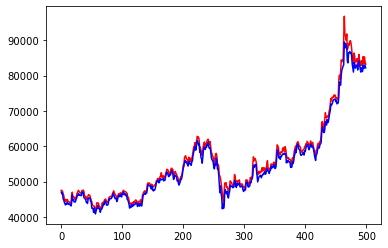

In [35]:
plt.plot(Samsung["high"], "r")
plt.plot(Samsung["low"], "b")

plt.xticks()
plt.yticks()

plt.show()

In [46]:
train = Samsung.to_numpy()

(date, op, high, low, cl, vol) = np.hsplit(train, 6)
high.shape

(500, 1)

In [51]:
high.reshape(500,)
x = np.linspace(0,500,500)

In [53]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x.reshape(500,1),high)

LinearRegression()

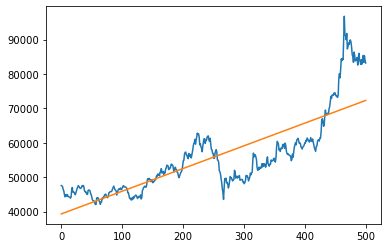

In [56]:
plt.plot(x,high)
plt.plot(x,linreg.predict(x.reshape(500,1)))

plt.show()